In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [100]:
df = pd.read_csv('used_car_price_dataset_extended.csv')

In [101]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [102]:
df.shape

(10000, 12)

In [103]:
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [104]:
df.duplicated().sum()

0

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [106]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [107]:
df['service_history'].fillna('Partial', inplace=True)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_19948\844551172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service_history'].fillna('Partial', inplace=True)


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [109]:
# Car age
df['car_age'] = 2025 - df['make_year']
# Price per cc
df['price_per_cc'] = df['price_usd'] / df['engine_cc']

# Optional: convert to USD per 1000 cc (more readable)
df['price_per_1000cc'] = df['price_per_cc'] * 1000

# 📌 Round decimals to 2 places
df['price_per_cc'] = df['price_per_cc']
df['price_per_1000cc'] = df['price_per_1000cc'].round(2)

In [110]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,car_age,price_per_cc,price_per_1000cc
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Partial,0,No,24,2.146910,2146.91
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Partial,0,Yes,11,3.962333,3962.33
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,2,3.709432,3709.43
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,16,8.545300,8545.30
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,20,4.625790,4625.79


In [111]:
#Descriptive Statistics
avg_price = df["price_usd"].mean()
std_price = df["price_usd"].std()

print("Average Price:", avg_price)
print("Standard Deviation of Price:", std_price)

Average Price: 7179.754531999999
Standard Deviation of Price: 2795.2709403447416


In [112]:
avg_mileage = df["mileage_kmpl"].mean()
std_mileage = df["mileage_kmpl"].std()
print(f"Average mileage: {avg_mileage:.1f} kmpl (± {std_mileage:.1f})")

Average mileage: 18.0 kmpl (± 5.0)


In [113]:
avg_age = df["car_age"].mean()
std_age = df["car_age"].std()
print(f"Average car age: {avg_age:.1f} years (± {std_age:.1f})")

Average car age: 15.8 years (± 8.4)


In [114]:
avg_owners = df["owner_count"].mean()
std_owners = df["owner_count"].std()
print(f"Average owners: {avg_owners:.1f} (± {std_owners:.1f})")

Average owners: 3.0 (± 1.4)


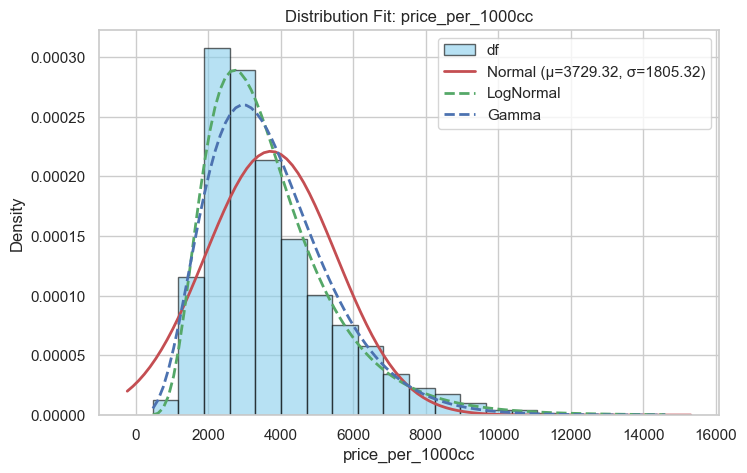

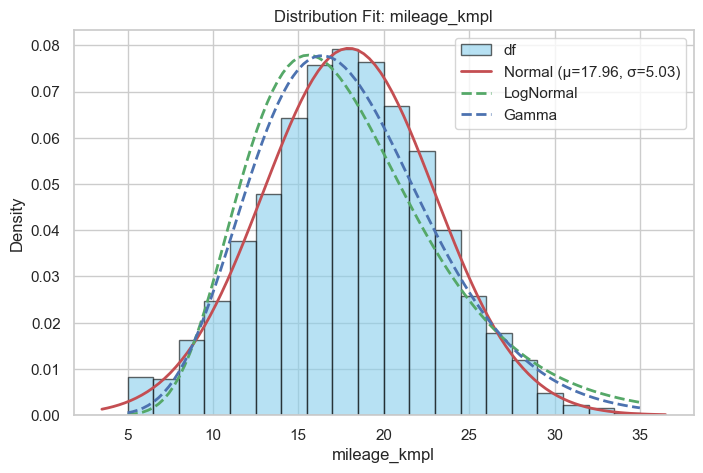

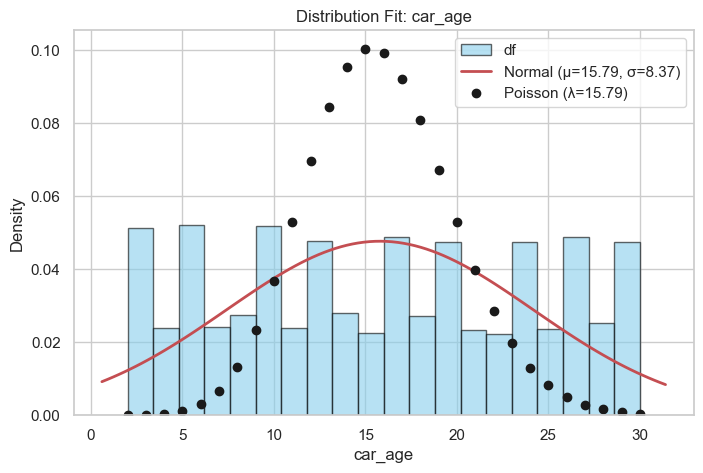

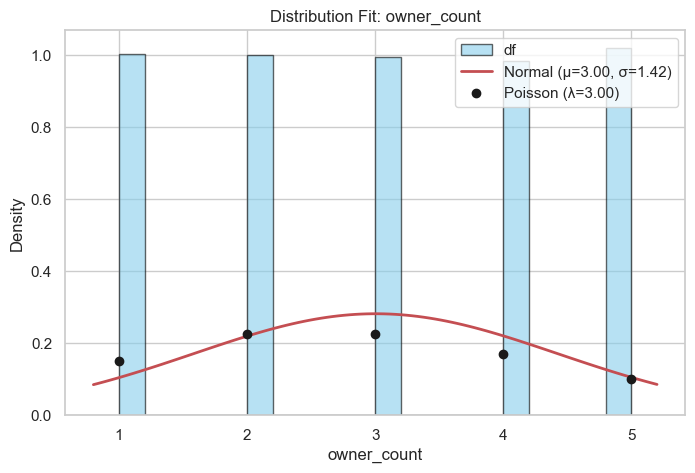

In [115]:
#Random probability distributions distribution 
import scipy.stats as stats

def plot_distribution(variable, distributions=["norm","lognorm","gamma","poisson"], bins=20):
    x = df[variable].dropna().values
    
    plt.figure(figsize=(8,5))
    plt.hist(x, bins=bins, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="df")
    
    # Continuous distributions
    if "norm" in distributions:
        mu, sigma = stats.norm.fit(x)
        xmin, xmax = plt.xlim()
        xs = np.linspace(xmin, xmax, 100)
        plt.plot(xs, stats.norm.pdf(xs, mu, sigma), 'r-', lw=2, label=f"Normal (μ={mu:.2f}, σ={sigma:.2f})")
    
    if "lognorm" in distributions:
        shape, loc, scale = stats.lognorm.fit(x, floc=0)
        xs = np.linspace(min(x), max(x), 100)
        plt.plot(xs, stats.lognorm.pdf(xs, shape, loc, scale), 'g--', lw=2, label="LogNormal")
    
    if "gamma" in distributions:
        a, loc, scale = stats.gamma.fit(x, floc=0)
        xs = np.linspace(min(x), max(x), 100)
        plt.plot(xs, stats.gamma.pdf(xs, a, loc, scale), 'b--', lw=2, label="Gamma")
    
    # Discrete (Poisson) – only if integer valued
    if "poisson" in distributions and np.all(np.floor(x) == x):
        mu = np.mean(x)
        xs = np.arange(min(x), max(x)+1)
        plt.plot(xs, stats.poisson.pmf(xs, mu), 'ko', label=f"Poisson (λ={mu:.2f})")
    
    plt.title(f"Distribution Fit: {variable}")
    plt.xlabel(variable)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# -------------------------------
# 3. Plot for selected variables
# -------------------------------
plot_distribution("price_per_1000cc")
plot_distribution("mileage_kmpl")
plot_distribution("car_age", distributions=["poisson","norm"])
plot_distribution("owner_count", distributions=["poisson","norm"])

In [116]:
# Inferential stats
mean_brand = df.groupby("brand")["price_per_1000cc"].mean().sort_values(ascending=False)
print(mean_brand)

brand
Honda         3852.356301
BMW           3838.017444
Volkswagen    3759.401955
Kia           3748.980733
Chevrolet     3726.660871
Nissan        3709.979789
Toyota        3686.711109
Hyundai       3660.494762
Ford          3658.344099
Tesla         3645.508519
Name: price_per_1000cc, dtype: float64


In [117]:
# Group by fuel_type and calculate mean + std of price_per_1000cc
mean_fuel = df.groupby("fuel_type")["price_per_1000cc"].agg(["mean", "std"]).sort_values("mean", ascending=False)

print(mean_fuel)

                  mean          std
fuel_type                          
Electric   5294.677351  2258.811686
Petrol     3578.063196  1657.138591
Diesel     3538.790478  1671.864271


In [118]:
mean_service = df.groupby("service_history")["price_per_1000cc"].agg(["mean", "std"]).sort_values("mean", ascending=False)
print(mean_service)

                        mean          std
service_history                          
Partial          3742.898386  1855.963802
Full             3715.679938  1753.207172


In [119]:
# 1. T-test (Full vs Partial service price)
from scipy.stats import ttest_ind
full_prices = df[df["service_history"] == "Full"]["price_per_1000cc"]
partial_prices = df[df["service_history"] == "Partial"]["price_per_1000cc"]
t_stat, p_val = ttest_ind(full_prices, partial_prices, equal_var=False)
print(f"T-test (Full vs Partial service price): t = {t_stat:.2f}, p = {p_val:.3f}")

T-test (Full vs Partial service price): t = -0.75, p = 0.451


In [120]:
# 2. ANOVA (Fuel type vs price)
from scipy.stats import f_oneway
fuel_groups = [group["price_per_1000cc"].values for name, group in df.groupby("fuel_type")]
F_stat, p_val_anova = f_oneway(*fuel_groups)
print(f"ANOVA (Fuel type vs price): F = {F_stat:.2f}, p = {p_val_anova:.3f}")

ANOVA (Fuel type vs price): F = 441.96, p = 0.000


In [121]:
# 3. Chi-square (Service history vs Accident)
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df["service_history"], df["accidents_reported"])
chi2, p_val_chi, dof, expected = chi2_contingency(contingency)
print(f"Chi-square (Service history vs Accident): χ² = {chi2:.2f}, p = {p_val_chi:.3f}")

Chi-square (Service history vs Accident): χ² = 6.20, p = 0.287


In [122]:
# 4. Correlation (Car age vs Price)
from scipy.stats import pearsonr
r, p_corr = pearsonr(df["car_age"], df["price_per_cc"])
print(f"Correlation (Car age vs Price): r = {r:.2f}, p = {p_corr:.3e}")

Correlation (Car age vs Price): r = -0.42, p = 0.000e+00


In [123]:
import pandas as pd
import numpy as np

# --- Step 1: Normalize key features for scoring ---
df['age_score'] = 1 - (df['car_age'] - df['car_age'].min()) / (df['car_age'].max() - df['car_age'].min())
df['mileage_score'] = (df['mileage_kmpl'] - df['mileage_kmpl'].min()) / (df['mileage_kmpl'].max() - df['mileage_kmpl'].min())
df['engine_score'] = 1 - (df['engine_cc'] - df['engine_cc'].min()) / (df['engine_cc'].max() - df['engine_cc'].min())
df['price_score'] = 1 - (df['price_per_1000cc'] - df['price_per_1000cc'].min()) / (df['price_per_1000cc'].max() - df['price_per_1000cc'].min())

# --- Step 2: Weighted total score ---
# Adjust weights as per buyer priorities
# Example: Age 30%, Mileage 25%, Engine 15%, Price 30%
df['total_score'] = (df['age_score']*0.3 +
                     df['mileage_score']*0.25 +
                     df['engine_score']*0.15 +
                     df['price_score']*0.3)

# --- Step 1: Define buyer type function ---
def buyer_type(row):
    # Electric cars are considered first
    if row['fuel_type'].lower() == 'electric':
        return 'Eco-conscious Buyer'
    elif row['total_score'] >= 80:
        return 'Premium Buyer'
    elif row['car_age'] > df['car_age'].median():
        return 'Budget Buyer'
    else:
        return 'General Buyer'

# --- Step 2: Apply function to DataFrame ---
df['buyer_type'] = df.apply(buyer_type, axis=1)

# --- Step 3: Create scorecard with relevant columns ---
scorecard = df[['brand', 'make_year', 'car_age', 'mileage_kmpl', 'engine_cc', 
                'price_per_1000cc', 'fuel_type', 'service_history', 'total_score', 'buyer_type']]

# --- Step 4: Sort by total_score descending for recommendation ---
scorecard = scorecard.sort_values(by='total_score', ascending=False)

In [124]:
# Convert all string columns to lowercase
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

In [38]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,...,insurance_valid,car_age,price_per_cc,price_per_1000cc,age_score,mileage_score,engine_score,price_score,total_score,buyer_type
0,2001,8.17,4000,petrol,4,8587.64,chevrolet,manual,white,partial,...,no,24,2.146910,2146.91,0.214286,0.105667,0.238095,0.881896,0.390985,budget buyer
1,2014,17.59,1500,petrol,4,5943.50,honda,manual,black,partial,...,yes,11,3.962333,3962.33,0.678571,0.419667,0.833333,0.753396,0.659507,general buyer
2,2023,18.09,2500,diesel,5,9273.58,bmw,automatic,black,full,...,yes,2,3.709432,3709.43,1.000000,0.436333,0.595238,0.771297,0.729758,general buyer
3,2009,11.28,800,petrol,1,6836.24,hyundai,manual,blue,full,...,yes,16,8.545300,8545.30,0.500000,0.209333,1.000000,0.429004,0.481035,general buyer
4,2005,12.23,1000,petrol,2,4625.79,nissan,automatic,red,full,...,yes,20,4.625790,4625.79,0.357143,0.241000,0.952381,0.706435,0.522181,budget buyer


<Axes: xlabel='mileage_kmpl'>

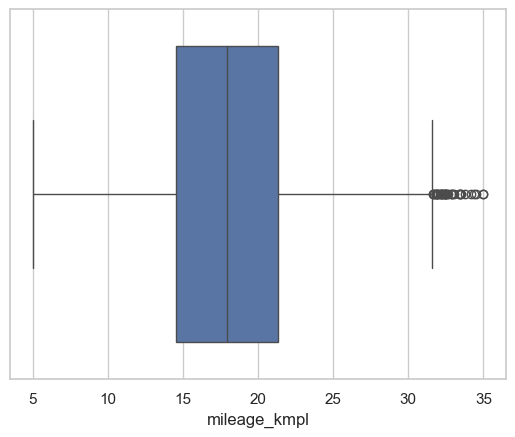

In [125]:
# IQR 
# Outlier detetct
sns.boxplot(data=df, x='mileage_kmpl')

In [126]:
Q1 = df['mileage_kmpl'].quantile(0.10)
Q2 = df['mileage_kmpl'].quantile(0.35)
Q3 = df['mileage_kmpl'].quantile(0.50)

IQR = Q3-Q1
lower_limit = Q1-1.5 *IQR
upper_limit = Q3+1.5 *IQR
print(lower_limit)
print(upper_limit)

1.742500000000005
27.706499999999995


In [127]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(
    min_capping_dict={'mileage_kmpl': 1.742500000000005},
    max_capping_dict={'mileage_kmpl': 27.706499999999995}
)

df[['mileage_kmpl']] = arb.fit_transform(df[['mileage_kmpl']])

<Axes: xlabel='mileage_kmpl'>

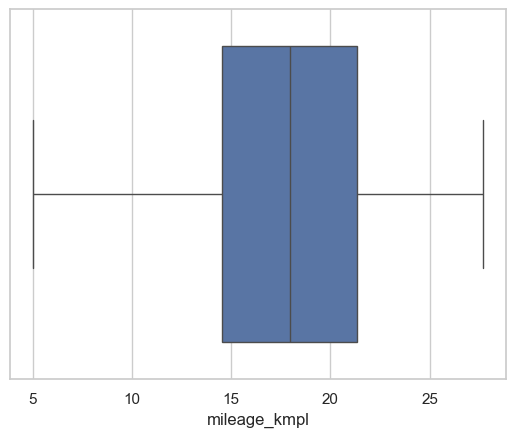

In [128]:
sns.boxplot(data=df, x='mileage_kmpl')

C:\Users\yuvar\AppData\Local\Temp\ipykernel_19948\2869356196.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='buyer_type', y='total_score', data=avg_scores, palette=palette)


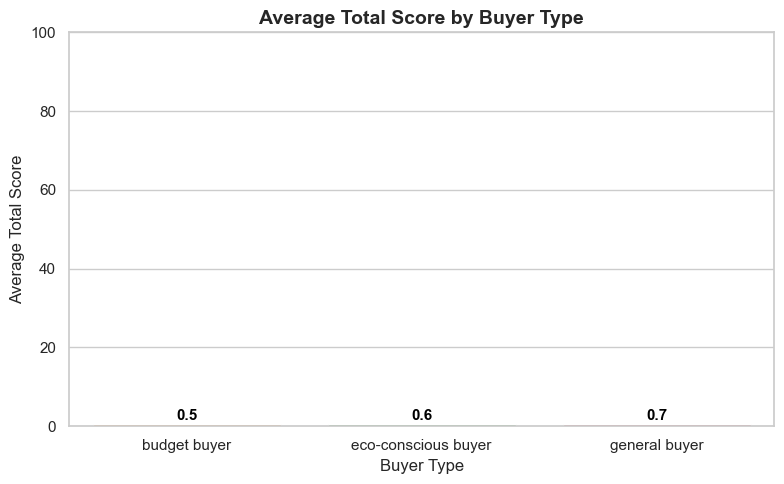

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Calculate average total score per buyer type ---
avg_scores = df.groupby('buyer_type')['total_score'].mean().reset_index()

# --- Step 2: Set plot style ---
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

palette = {
    'premium buyer':'#1f77b4', 
    'budget buyer':'#ff7f0e', 
    'eco-conscious buyer':'#2ca02c', 
    'general buyer':'#d62728'
}

sns.barplot(x='buyer_type', y='total_score', data=avg_scores, palette=palette)

# --- Step 4: Add titles and labels ---
plt.title("Average Total Score by Buyer Type", fontsize=14, weight='bold')
plt.xlabel("Buyer Type", fontsize=12)
plt.ylabel("Average Total Score", fontsize=12)
plt.ylim(0, 100)  # assuming total_score is out of 100

# --- Step 5: Show value on top of each bar ---
for index, row in avg_scores.iterrows():
    plt.text(index, row['total_score'] + 1, round(row['total_score'], 1), 
             color='black', ha="center", fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

Percentage of cars per buyer type:

buyer_type
General Buyer          48.02
Budget Buyer           42.24
Eco-conscious Buyer     9.74
Name: count, dtype: float64

Percentage of cars per fuel type:

fuel_type
Petrol      49.68
Diesel      40.58
Electric     9.74
Name: count, dtype: float64


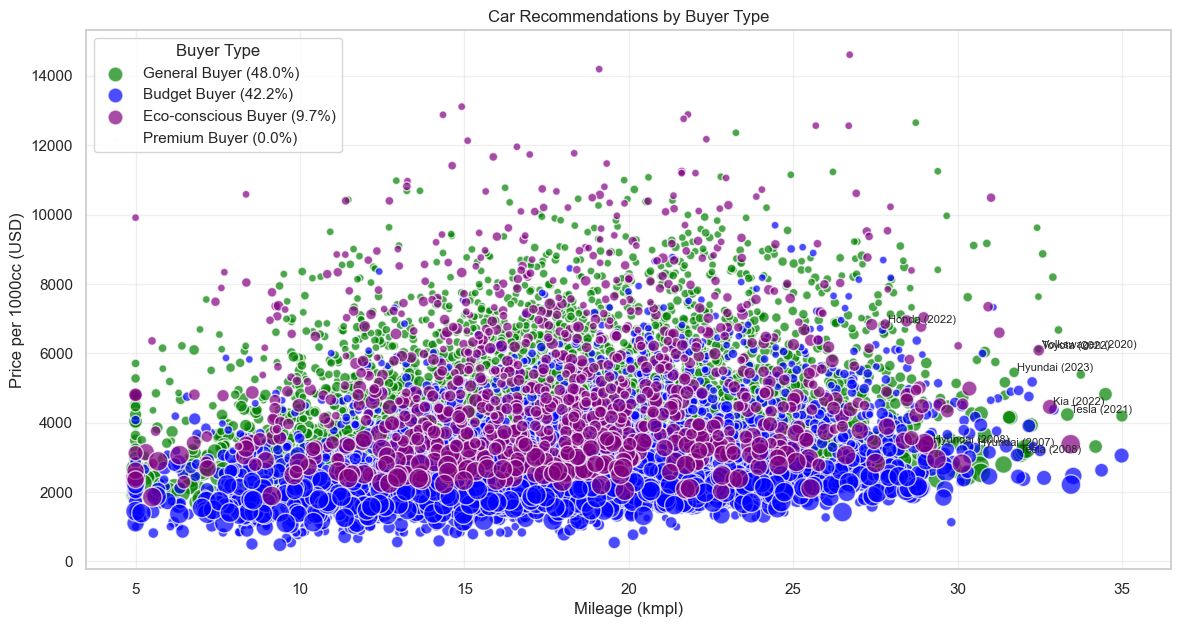

In [130]:
import matplotlib.pyplot as plt

# Filter multiple buyer types
buyer_types = ['General Buyer', 'Budget Buyer', 'Eco-conscious Buyer', 'Premium Buyer']
all_buyers = scorecard[scorecard['buyer_type'].isin(buyer_types)]

# --- 📌 Calculate percentage of cars per buyer type ---
buyer_counts = all_buyers['buyer_type'].value_counts()
buyer_percentages = (buyer_counts / buyer_counts.sum()) * 100

print("Percentage of cars per buyer type:\n")
print(buyer_percentages.round(2))

# --- 📌 Calculate percentage of cars per fuel type ---
fuel_counts = all_buyers['fuel_type'].value_counts()
fuel_percentages = (fuel_counts / fuel_counts.sum()) * 100

print("\nPercentage of cars per fuel type:\n")
print(fuel_percentages.round(2))

# Define colors for buyer types
colors = {
    'General Buyer': 'green',
    'Budget Buyer': 'blue',
    'Eco-conscious Buyer': 'purple',
    'Premium Buyer': 'orange'
}

plt.figure(figsize=(14,7))

# Plot each buyer type
for buyer in buyer_types:
    subset = all_buyers[all_buyers['buyer_type'] == buyer]
    plt.scatter(
        subset['mileage_kmpl'],
        subset['price_per_1000cc'],
        s=(subset['engine_cc'] / subset['engine_cc'].max()) * 200,  # normalized marker size
        c=colors[buyer],
        alpha=0.7,
        label=f"{buyer} ({buyer_percentages.get(buyer,0):.1f}%)",  # add % in legend
        edgecolors='w'
    )

# Annotate top 3 cars per buyer type
for buyer in buyer_types:
    subset = all_buyers[all_buyers['buyer_type'] == buyer]
    top_cars = subset.sort_values(by='total_score', ascending=False).head(3)
    for idx, row in top_cars.iterrows():
        plt.text(row['mileage_kmpl']+0.1, row['price_per_1000cc']+50,
                 f"{row['brand']} ({row['make_year']})", fontsize=8)

plt.title("Car Recommendations by Buyer Type")
plt.xlabel("Mileage (kmpl)")
plt.ylabel("Price per 1000cc (USD)")
plt.legend(title="Buyer Type")
plt.grid(alpha=0.3)
plt.show()

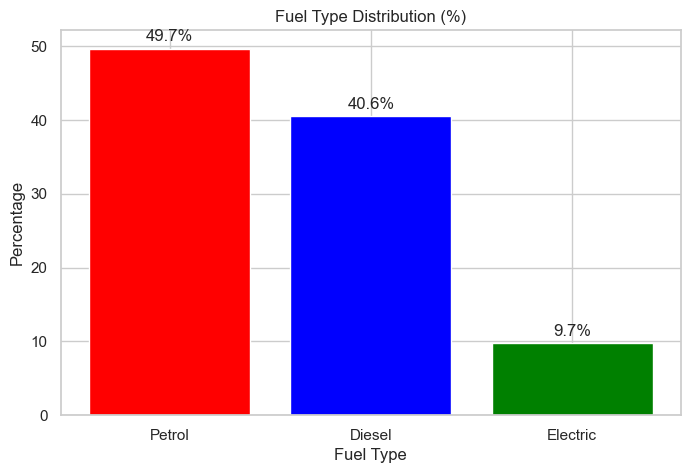

In [131]:
# --- 📊 Plot Fuel Type Distribution as a bar chart ---
plt.figure(figsize=(8,5))
plt.bar(fuel_percentages.index, fuel_percentages.values, color=["red","blue","green","orange"])
plt.title("Fuel Type Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Fuel Type")
for i, val in enumerate(fuel_percentages.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center')
plt.show()

C:\Users\yuvar\AppData\Local\Temp\ipykernel_19948\1429798139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="service_history", y="price_per_cc", data=df, palette="Set2")


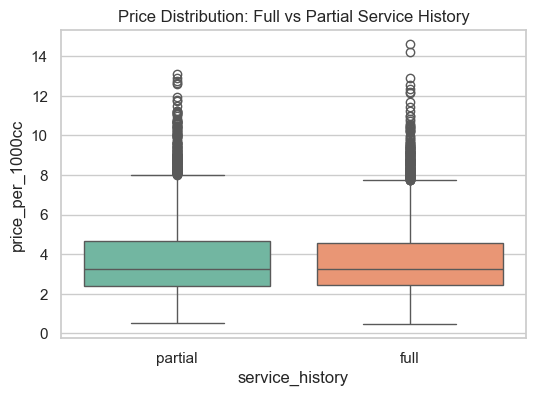

In [132]:
# 1. T-test → Boxplot (Service history vs Price)
plt.figure(figsize=(6,4))
sns.boxplot(x="service_history", y="price_per_cc", data=df, palette="Set2")
plt.title("Price Distribution: Full vs Partial Service History")
plt.ylabel("price_per_1000cc")
plt.show()

C:\Users\yuvar\AppData\Local\Temp\ipykernel_19948\1864543225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="fuel_type", y="price_per_cc", data=df, palette="Set3")


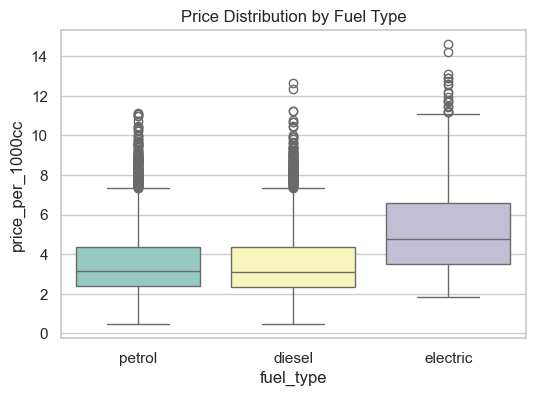

In [133]:
# 2. ANOVA → Boxplot (Fuel type vs Price)
plt.figure(figsize=(6,4))
sns.boxplot(x="fuel_type", y="price_per_cc", data=df, palette="Set3")
plt.title("Price Distribution by Fuel Type")
plt.ylabel("price_per_1000cc")
plt.show()

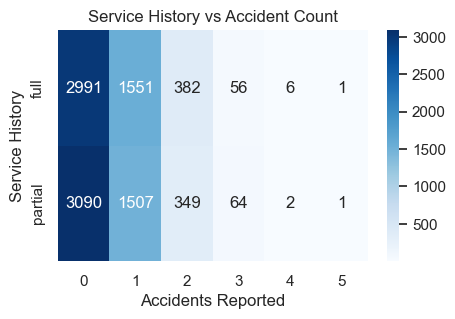

In [134]:
# 3. Chi-square → Heatmap (Service History vs Accidents)
contingency = pd.crosstab(df["service_history"], df["accidents_reported"])
plt.figure(figsize=(5,3))
sns.heatmap(contingency, annot=True, cmap="Blues", fmt="d")
plt.title("Service History vs Accident Count")
plt.xlabel("Accidents Reported")
plt.ylabel("Service History")
plt.show()

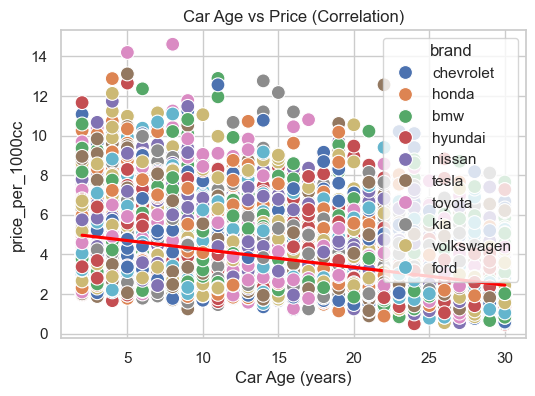

In [135]:
# 4. Correlation → Scatterplot (Car age vs Price)
plt.figure(figsize=(6,4))
sns.scatterplot(x="car_age", y="price_per_cc", hue="brand", s=100, data=df)
sns.regplot(x="car_age", y="price_per_cc", data=df, scatter=False, color="red")
plt.title("Car Age vs Price (Correlation)")
plt.xlabel("Car Age (years)")
plt.ylabel("price_per_1000cc")
plt.show()

In [136]:
df = df[['make_year','mileage_kmpl','engine_cc','fuel_type','brand','transmission',	
         'service_history','accidents_reported','insurance_valid','buyer_type','price_per_1000cc']]

In [137]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,brand,transmission,service_history,accidents_reported,insurance_valid,buyer_type,price_per_1000cc
0,2001,8.17,4000,petrol,chevrolet,manual,partial,0,no,budget buyer,2146.91
1,2014,17.59,1500,petrol,honda,manual,partial,0,yes,general buyer,3962.33
2,2023,18.09,2500,diesel,bmw,automatic,full,1,yes,general buyer,3709.43
3,2009,11.28,800,petrol,hyundai,manual,full,0,yes,general buyer,8545.30
4,2005,12.23,1000,petrol,nissan,automatic,full,0,yes,budget buyer,4625.79


In [138]:
df = df.rename(columns={
    "make_year": "Make Year",
    "mileage_kmpl": "Mileage (kmpl)",
    "engine_cc": "Engine CC",
    "fuel_type": "Fuel Type",
    "brand": "Brand",
    "transmission": "Transmission",
    "service_history": "Service History",
    "accidents_reported" :"Accidents Reports",
    "insurance_valid": "Insurance Valid",
    "buyer_type": "Buyer Type",
    "price_per_1000cc": "Price USD"
})

In [139]:
df.head()

,Make Year,Mileage (kmpl),Engine CC,Fuel Type,Brand,Transmission,Service History,Accidents Reports,Insurance Valid,Buyer Type,Price USD
0,2001,8.17,4000,petrol,chevrolet,manual,partial,0,no,budget buyer,2146.91
1,2014,17.59,1500,petrol,honda,manual,partial,0,yes,general buyer,3962.33
2,2023,18.09,2500,diesel,bmw,automatic,full,1,yes,general buyer,3709.43
3,2009,11.28,800,petrol,hyundai,manual,full,0,yes,general buyer,8545.30
4,2005,12.23,1000,petrol,nissan,automatic,full,0,yes,budget buyer,4625.79


In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Correct way (use quotes for column name with spaces)
df['Service History'] = le.fit_transform(df['Service History'].values)

In [141]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Correct way (use quotes for column name with spaces)
df['Insurance Valid'] = le.fit_transform(df['Insurance Valid'].values)

In [142]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Correct way (use quotes for column name with spaces)
df['Transmission'] = le.fit_transform(df['Transmission'].values)

In [143]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Correct way (use quotes for column name with spaces)
df['Buyer Type'] = le.fit_transform(df['Buyer Type'].values)

In [144]:
df.head()

,Make Year,Mileage (kmpl),Engine CC,Fuel Type,Brand,Transmission,Service History,Accidents Reports,Insurance Valid,Buyer Type,Price USD
0,2001,8.17,4000,petrol,chevrolet,1,1,0,0,0,2146.91
1,2014,17.59,1500,petrol,honda,1,1,0,1,2,3962.33
2,2023,18.09,2500,diesel,bmw,0,0,1,1,2,3709.43
3,2009,11.28,800,petrol,hyundai,1,0,0,1,2,8545.30
4,2005,12.23,1000,petrol,nissan,0,0,0,1,0,4625.79


In [145]:
# Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [146]:
X = df.drop(columns=['Price USD'])
y = df['Price USD']

In [147]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [148]:
preprocessor = ColumnTransformer(transformers=[
    ('Ordinal', OrdinalEncoder(), ['Fuel Type', 'Brand']),
    ('num', StandardScaler(), ['Make Year',	'Mileage (kmpl)','Engine CC','Transmission','Service History','Insurance Valid','Buyer Type'])
], remainder='passthrough')

In [149]:
pipeline = Pipeline([
('preprocessor',preprocessor),
('model',XGBRegressor())]
)

In [150]:
pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Ordinal', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [151]:
y_pred = pipeline.predict(X_test)

In [152]:
r2_score(y_test, y_pred)

0.7514794586329583

In [153]:
mean_absolute_error(y_test,y_pred)

627.6812477099609

In [154]:
kfold = KFold(n_splits=5,shuffle = True, random_state=42)
cv_results = cross_val_score(pipeline,X, y, cv = kfold, scoring = 'r2')

In [155]:
cv_results.mean()

0.7572022795770181

In [156]:
with open('carsales_model.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [157]:
df.head()

,Make Year,Mileage (kmpl),Engine CC,Fuel Type,Brand,Transmission,Service History,Accidents Reports,Insurance Valid,Buyer Type,Price USD
0,2001,8.17,4000,petrol,chevrolet,1,1,0,0,0,2146.91
1,2014,17.59,1500,petrol,honda,1,1,0,1,2,3962.33
2,2023,18.09,2500,diesel,bmw,0,0,1,1,2,3709.43
3,2009,11.28,800,petrol,hyundai,1,0,0,1,2,8545.30
4,2005,12.23,1000,petrol,nissan,0,0,0,1,0,4625.79


In [166]:
input_df = pd.DataFrame(
    [[2001, 8.17, 4000, "petrol", "honda", 1, 1, 0, 0,0]],
    columns=['Make Year','Mileage (kmpl)','Engine CC','Fuel Type','Brand',
             'Transmission','Service History','Accidents Reports','Insurance Valid','Buyer Type']
)

prediction = pipeline.predict(input_df)
print(prediction)

[1444.9921]
